In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/SophonPlus/ChineseNlpCorpus/master/datasets/ChnSentiCorp_htl_all/ChnSentiCorp_htl_all.csv')

In [ ]:
len(data)

7766

In [ ]:
data.head()

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"


In [ ]:
data.tail()

,label,review
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...
7765,0,说实在的我很失望，之前看了其他人的点评后觉得还可以才去的，结果让我们大跌眼镜。我想这家酒店以...


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 0 to 7765
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7766 non-null   int64 
 1   review  7765 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.5+ KB


In [ ]:
data['review'] = data['review'].astype(str) 

In [ ]:
import jieba

In [ ]:
jieba.lcut(data.review[4])

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.062 seconds.
Prefix dict has been built successfully.


['CBD',
 '中心',
 ',',
 '周围',
 '没什么',
 '店铺',
 ',',
 '说',
 '5',
 '星',
 '有点',
 '勉强',
 '.',
 '不',
 '知道',
 '为什么',
 '卫生间',
 '没有',
 '电吹风']

In [ ]:
#全部一起斷
data.review.apply(jieba.lcut)

0       [距离, 川沙, 公路, 较近, ,, 但是, 公交, 指示, 不, 对, ,, 如果, 是...
1       [商务, 大床, 房, ，, 房间, 很大, ，, 床有, 2M, 宽, ，, 整体, 感觉...
2       [早餐, 太, 差, ，, 无论, 去, 多少, 人, ，, 那边, 也, 不加, 食品, ...
3       [宾馆, 在, 小, 街道, 上, ，, 不大好, 找, ，, 但, 还好, 北京, 热心,...
4       [CBD, 中心, ,, 周围, 没什么, 店铺, ,, 说, 5, 星, 有点, 勉强, ...
                              ...                        
7761    [尼斯, 酒店, 的, 几大, 特点, ：, 噪音, 大, 、, 环境, 差, 、, 配置,...
7762    [盐城, 来, 了, 很, 多次, ，, 第一次, 住, 盐阜, 宾馆, ，, 我, 的确,...
7763    [看, 照片, 觉得, 还, 挺不错, 的, ，, 又, 是, 4, 星级, 的, ，, 但...
7764    [我们, 去, 盐城, 的, 时候, 那里, 的, 最低气温, 只有, 4, 度, ，, 晚...
7765    [说, 实在, 的, 我, 很, 失望, ，, 之前, 看, 了, 其他人, 的, 点评, ...
Name: review, Length: 7766, dtype: object

In [ ]:
#增加text column
data['text'] = data.review.apply(lambda sen: jieba.lcut(sen))
data.head()

,label,review,text
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...","[距离, 川沙, 公路, 较近, ,, 但是, 公交, 指示, 不, 对, ,, 如果, 是..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!,"[商务, 大床, 房, ，, 房间, 很大, ，, 床有, 2M, 宽, ，, 整体, 感觉..."
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。,"[早餐, 太, 差, ，, 无论, 去, 多少, 人, ，, 那边, 也, 不加, 食品, ..."
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...,"[宾馆, 在, 小, 街道, 上, ，, 不大好, 找, ，, 但, 还好, 北京, 热心,..."
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风","[CBD, 中心, ,, 周围, 没什么, 店铺, ,, 说, 5, 星, 有点, 勉强, ..."


In [ ]:
#針對斷詞後的資料分別產生詞向量
from gensim.models import Word2Vec

In [ ]:
myWord2Vec = Word2Vec(data.text,size=250,iter=10,sg=1,min_count=1)#sg=1為skipgram,250為Z1...-...Z250

In [ ]:
print(myWord2Vec)

Word2Vec(vocab=29716, size=250, alpha=0.025)


In [ ]:
#看每一個詞彙經過word2vec運算的結果
myWord2Vec.wv.vocab

{'距离': <gensim.models.keyedvectors.Vocab at 0x7fc75af4ced0>,
 '川沙': <gensim.models.keyedvectors.Vocab at 0x7fc75af4cc50>,
 '公路': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6b90>,
 '较近': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6c10>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6310>,
 '但是': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6290>,
 '公交': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6bd0>,
 '指示': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6c50>,
 '不': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6350>,
 '对': <gensim.models.keyedvectors.Vocab at 0x7fc75aed61d0>,
 '如果': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6c90>,
 '是': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6cd0>,
 '"': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6d10>,
 '蔡陆线': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6d50>,
 '的话': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6d90>,
 '会': <gensim.models.keyedvectors.Vocab at 0x7fc75aed6dd0>,
 '非常': <gensim.models.keyedve

In [ ]:
import numpy as np
#避免後續因為索引編號為0的逗號"，"有衝突，因此將每一個詞彙索引編號都加1
[1+myWord2Vec.wv.vocab[sen].index for sen in data.text[0]]

[448,
 14412,
 4005,
 2595,
 4,
 54,
 1590,
 2823,
 19,
 65,
 4,
 100,
 7,
 342,
 14413,
 342,
 233,
 4,
 75,
 38,
 891,
 13,
 164,
 118,
 667,
 2498,
 13,
 9,
 14414,
 13]

In [ ]:
embedding_matrix = myWord2Vec.wv.vectors

In [ ]:
embedding_matrix.shape

(29716, 250)

In [ ]:
#第一筆的資料
embedding_matrix[0]

array([ 0.10710197,  0.04274312,  0.17860433,  0.04560723, -0.00198118,
        0.06960344,  0.10880061, -0.01105855, -0.22642474, -0.03317486,
       -0.1442597 , -0.08709876,  0.05649582,  0.13520437,  0.04749431,
        0.05349465, -0.02607034,  0.11691744, -0.15236059, -0.04176781,
        0.12683348, -0.12813377, -0.14940608,  0.0477939 , -0.2190112 ,
       -0.06345335, -0.01471638,  0.01313288,  0.03526904, -0.29084668,
       -0.12069716, -0.02569283, -0.26180056, -0.08043479,  0.05725394,
        0.2330773 , -0.2931276 ,  0.1585408 , -0.00718308,  0.0819094 ,
        0.027816  , -0.09137814, -0.09670954,  0.08288105, -0.00196256,
        0.04015957,  0.07645441,  0.10513055,  0.2361981 , -0.15041131,
        0.0350144 , -0.17270459,  0.07555702, -0.22367337, -0.33171389,
        0.05477551, -0.29600415, -0.01537328,  0.18813883, -0.03583393,
       -0.0134662 , -0.06002612,  0.19798008, -0.03932808, -0.23826048,
        0.01420141, -0.21792848,  0.24780396, -0.00317032, -0.22

In [ ]:
#np.vstack()跟np.hstack()
embedding_matrix = np.vstack((np.array(np.zeros(250)),embedding_matrix))

In [ ]:
embedding_matrix.shape

(29717, 250)

In [ ]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#準備訓練資料
X = np.zeros([len(data.text),30],dtype='float64')

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data.text

0       [距离, 川沙, 公路, 较近, ,, 但是, 公交, 指示, 不, 对, ,, 如果, 是...
1       [商务, 大床, 房, ，, 房间, 很大, ，, 床有, 2M, 宽, ，, 整体, 感觉...
2       [早餐, 太, 差, ，, 无论, 去, 多少, 人, ，, 那边, 也, 不加, 食品, ...
3       [宾馆, 在, 小, 街道, 上, ，, 不大好, 找, ，, 但, 还好, 北京, 热心,...
4       [CBD, 中心, ,, 周围, 没什么, 店铺, ,, 说, 5, 星, 有点, 勉强, ...
                              ...                        
7761    [尼斯, 酒店, 的, 几大, 特点, ：, 噪音, 大, 、, 环境, 差, 、, 配置,...
7762    [盐城, 来, 了, 很, 多次, ，, 第一次, 住, 盐阜, 宾馆, ，, 我, 的确,...
7763    [看, 照片, 觉得, 还, 挺不错, 的, ，, 又, 是, 4, 星级, 的, ，, 但...
7764    [我们, 去, 盐城, 的, 时候, 那里, 的, 最低气温, 只有, 4, 度, ，, 晚...
7765    [说, 实在, 的, 我, 很, 失望, ，, 之前, 看, 了, 其他人, 的, 点评, ...
Name: text, Length: 7766, dtype: object

In [ ]:
for i in range(len(data.text)):
  for j in range(min(len(data.text[i]),30)):
    X[i,j] = 1+myWord2Vec.wv.vocab[data.text[i][j]].index

In [ ]:
X.shape

(7766, 30)

In [ ]:
X[0]

array([4.4800e+02, 1.4412e+04, 4.0050e+03, 2.5950e+03, 4.0000e+00,
       5.4000e+01, 1.5900e+03, 2.8230e+03, 1.9000e+01, 6.5000e+01,
       4.0000e+00, 1.0000e+02, 7.0000e+00, 3.4200e+02, 1.4413e+04,
       3.4200e+02, 2.3300e+02, 4.0000e+00, 7.5000e+01, 3.8000e+01,
       8.9100e+02, 1.3000e+01, 1.6400e+02, 1.1800e+02, 6.6700e+02,
       2.4980e+03, 1.3000e+01, 9.0000e+00, 1.4414e+04, 1.3000e+01])

In [ ]:
y = data.label

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7761    0
7762    0
7763    0
7764    0
7765    0
Name: label, Length: 7766, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=0,stratify=y)


In [ ]:
len(X_train)

4659

In [ ]:
len(X_test)

3107

In [ ]:
len(y_train)

4659

In [ ]:
len(y_test)

3107

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

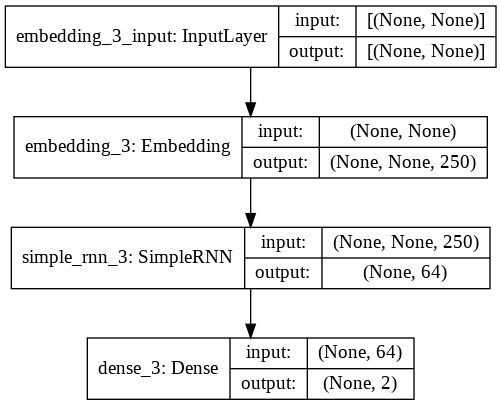

In [ ]:
#要開始架構RNN網路
RNN = keras.Sequential(name='RNN')
RNN.add(layers.Embedding(len(myWord2Vec.wv.vocab)+1,250))
RNN.add(layers.SimpleRNN(64))
RNN.add(layers.Dense(2,activation = "softmax"))
keras.utils.plot_model(RNN,show_shapes=True)

In [ ]:
RNN.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 250)         7429250   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                20160     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 7,449,540
Trainable params: 7,449,540
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNN.layers[0].set_weights([embedding_matrix])
RNN.layers[0].trainable = False
RNN.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 250)         7429250   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                20160     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 7,449,540
Trainable params: 20,290
Non-trainable params: 7,429,250
_________________________________________________________________


In [ ]:
RNN.compile(optimizer = 'Adam',loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
RNN.fit(X_train,y_train,epochs=30)

Epoch 1/30
146/146 [==============================] - 3s 11ms/step - loss: 0.6141 - accuracy: 0.6864
Epoch 2/30
146/146 [==============================] - 2s 11ms/step - loss: 0.5413 - accuracy: 0.7504
Epoch 3/30
146/146 [==============================] - 2s 11ms/step - loss: 0.4613 - accuracy: 0.7892
Epoch 4/30
146/146 [==============================] - 2s 10ms/step - loss: 0.4263 - accuracy: 0.8206
Epoch 5/30
146/146 [==============================] - 2s 10ms/step - loss: 0.4096 - accuracy: 0.8178
Epoch 6/30
146/146 [==============================] - 2s 10ms/step - loss: 0.4028 - accuracy: 0.8287
Epoch 7/30
146/146 [==============================] - 1s 10ms/step - loss: 0.3675 - accuracy: 0.8461
Epoch 8/30
146/146 [==============================] - 2s 11ms/step - loss: 0.3504 - accuracy: 0.8555
Epoch 9/30
146/146 [==============================] - 2s 11ms/step - loss: 0.3204 - accuracy: 0.8714
Epoch 10/30
146/146 [==============================] - 2s 11ms/step - loss: 0.2975 - accura

In [ ]:
from sklearn import metrics

#預測
y_test_predicted = RNN.predict_classes(X_test)

# 績效
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print(accuracy)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7524943675571291


In [ ]:
y_test_predicted

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       978
           1       0.83      0.80      0.82      2129

    accuracy                           0.75      3107
   macro avg       0.71      0.72      0.72      3107
weighted avg       0.76      0.75      0.75      3107



In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_test_predicted))
print("Precision:",metrics.precision_score(y_test,y_test_predicted))
print("Recall:",metrics.recall_score(y_test,y_test_predicted))

Accuracy: 0.7524943675571291
Precision: 0.8300970873786407
Recall: 0.8031939877876938


In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_test_predicted)
print(matrix)

[[ 628  350]
 [ 419 1710]]


Text(0.5, 257.44, 'Predicted label')

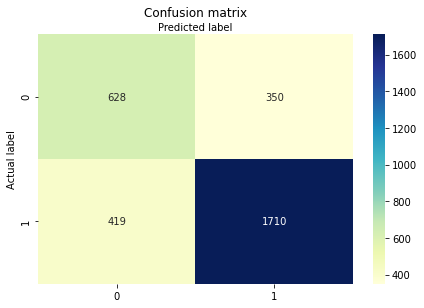

In [ ]:
#混淆矩陣視覺化(Heatmap)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')